# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [10]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')

In [11]:
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [12]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')

In [13]:
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,21.867754,46.046219,5471640,1.152145e+07
1,11020,21.524817,46.214336,5368440,1.152618e+07
2,11030,21.820458,38.412082,4959790,8.731066e+06
3,11040,22.150334,44.717847,5139830,1.037646e+07
4,11050,22.810568,50.043326,5020720,1.101479e+07


In [14]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [15]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [16]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,1.152145e+07
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,1.152618e+07
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8.731066e+06
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.717847,5139830,1.037646e+07
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.043326,5020720,1.101479e+07


## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요? => 자치구

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1
    - 노선 수가 많을수록 승차평균승객수가 많을 것이다.

* 가설 2
    - 이동인구가 많을수록 하차평균승객수가 많을 것이다.

* 가설 3
    - 정류장 수가 적을수록 이동시간이 많을 것이다.

## 2.단변량 분석

+ 변수의 비즈니스 의미  
    - 도착 시군구 코드: 각 자치구별 코드
    - 자치구 : 자치구
    - 정류장 수 : 그 자치구 안에 있는 정류장 수
    - 노선 수 : 그 자치구 안의 노선 수
    - 승차총승객수 : 자치구 안의 승차 수
    - 하차총승객수
    - 승차평균승객수
    - 하차평균승객수
    - 평균이동시간(분)_x
    - 이동인구(합)_x
    - 평균이동시간(분)_y
    - 이동인구(합)_y
+ 숫자? 범주?  
    - 다 숫자인듯

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  : 각25개씩 있음
   - 가변수화 대상여부  : 자치구?
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [12]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

In [13]:
for i in df.columns:
    print(df[i].unique())

[11010 11020 11030 11040 11050 11060 11070 11080 11090 11100 11110 11120
 11130 11140 11150 11160 11170 11180 11190 11200 11210 11220 11230 11240
 11250]
['종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구' '노원구' '은평구'
 '서대문구' '마포구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '강남구' '송파구'
 '강동구']
[349 178 323 435 269 306 380 602 413 359 514 501 456 562 319 566 486 345
 465 438 466 600 499 415 369]
[106 103  67  58  41  73  48  99  46  57  71 107  97  56  49  79 101  94
  86  93  91  55  21]
[5468935 3776675 4189977 2807280 2749448 5240565 3792541 6236424 4825181
 3304305 4353295 5201660 5863499 5088461 4009172 4681083 4942197 3776658
 5739875 5314274 7655819 7221330 8030483 5641742 2890053]
[5205394 3598932 4086474 2746738 2753411 5115379 3740923 6231238 4671783
 3211421 4292724 5122499 5796960 4957596 3851173 4652828 4730992 3581930
 5783211 5112276 7792476 6977950 7569213 5603488 2830506]
[131.88962041 121.02012369 137.89169354  96.37736885 118.35254617
 131.84142997  87.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   도착 시군구 코드    25 non-null     int64  
 1   자치구          25 non-null     object 
 2   정류장수         25 non-null     int64  
 3   노선수          25 non-null     int64  
 4   승차총승객수       25 non-null     int64  
 5   하차총승객수       25 non-null     int64  
 6   승차평균승객수      25 non-null     float64
 7   하차평균승객수      25 non-null     float64
 8   평균 이동 시간(분)  25 non-null     float64
 9   이동인구(합)      25 non-null     float64
 10  총 이동 시간      25 non-null     int64  
 11  총 이동인구       25 non-null     float64
dtypes: float64(5), int64(6), object(1)
memory usage: 2.5+ KB


In [15]:
df.describe()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
count,25.000000,25.000000,25.000000,2.500000e+01,2.500000e+01,25.000000,25.000000,25.000000,25.000000,2.500000e+01,2.500000e+01
mean,11130.000000,424.600000,72.920000,4.912037e+06,4.800701e+06,115.718291,113.031529,23.378500,54.379857,5.112084e+06,1.220658e+07
std,73.598007,106.279506,23.808122,1.421263e+06,1.400538e+06,17.080840,16.865744,1.363460,17.059207,6.157113e+05,5.190256e+06
min,11010.000000,178.000000,21.000000,2.749448e+06,2.746738e+06,87.403863,86.214261,21.524817,32.821422,3.789660e+06,5.122013e+06
25%,11070.000000,349.000000,56.000000,3.792541e+06,3.740923e+06,103.907639,101.235343,22.150334,44.717847,4.748160e+06,9.281801e+06
50%,11130.000000,435.000000,71.000000,4.942197e+06,4.730992e+06,119.235615,115.324511,23.162536,48.931749,5.132710e+06,1.101479e+07
75%,11190.000000,499.000000,94.000000,5.641742e+06,5.603488e+06,126.687777,122.418028,24.355289,60.518839,5.471640e+06,1.400831e+07
max,11250.000000,602.000000,107.000000,8.030483e+06,7.792476e+06,154.753674,157.516040,25.931701,104.437297,6.543820e+06,2.918250e+07


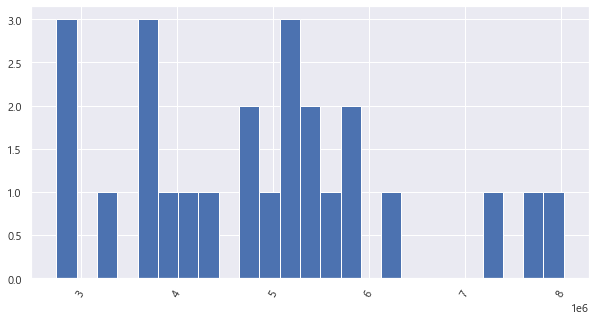

In [16]:
feature = '자치구'
target = '승차총승객수'

plt.figure(figsize=(10, 5))
plt.hist(df[target], bins = len(df[target]))
plt.xticks(rotation=60)
plt.show()

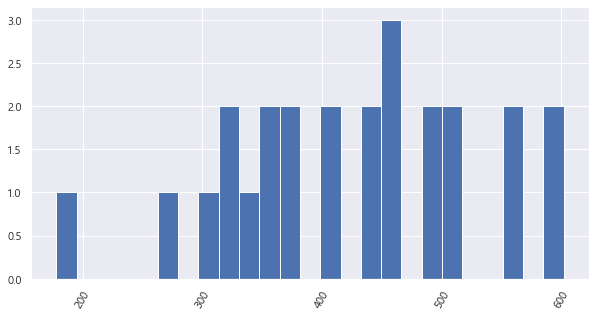

In [17]:
feature = '자치구'
target = '정류장수'

plt.figure(figsize=(10, 5))
plt.hist(df[target], bins = len(df[target]))
plt.xticks(rotation=60)
plt.show()

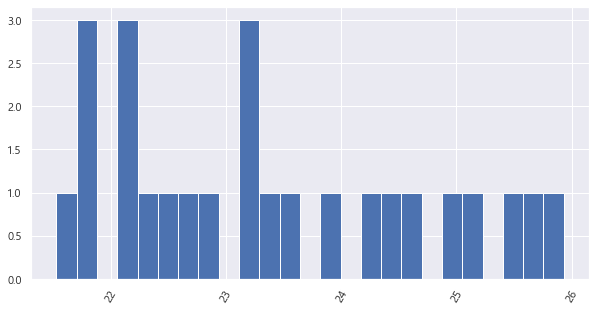

In [18]:
feature = '자치구'
target = '평균 이동 시간(분)'

plt.figure(figsize=(10, 5))
plt.hist(df[target], bins = len(df[target]))
plt.xticks(rotation=60)
plt.show()

### 1)
정류장은 보통 200개에서 600개 사이이며, 300개~500개 사이가 가장 많다.
그리고 정류장이 450개인 지역이 가장 많다.

### 2)
승차하는 승객은 300만명에서 600만명사이가 가장 많다.

### 3)
평균 이동시간은 모두 30분 미만이며, 21분에서 24분 사이에 많이 있다.

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [ ]:
target = '승차평균승객수'

### 1)

In [19]:
feature = '노선수'
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.457965,0.639658,0.276925,0.531874
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.199466,0.387141,0.359348,0.370605
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.693565,-0.013633,0.360500,0.188197
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.146534,0.472734,0.572455,0.568742
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.135064,0.460952,0.564608,0.550686
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.410118,-0.080959,0.124998,0.051692
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.387490,-0.076575,0.133859,0.045831
평균 이동 시간(분),0.457965,0.199466,-0.693565,-0.146534,-0.135064,-0.410118,-0.387490,1.000000,0.360419,-0.125621,0.120281
이동인구(합),0.639658,0.387141,-0.013633,0.472734,0.460952,-0.080959,-0.076575,0.360419,1.000000,0.812646,0.963787
총 이동 시간,0.276925,0.359348,0.360500,0.572455,0.564608,0.124998,0.133859,-0.125621,0.812646,1.000000,0.908128


### 2)

In [1]:
import scipy.stats as spst

In [56]:
spst.ttest_ind(df['도착 시군구 코드'], df['정류장수'])
#pvalue 0에 가까움 ->
# 통계량 414 

#둘이 아주 관계가 있다
# 도착 시군구 별로 정류장이 다름

Ttest_indResult(statistic=414.0556258924322, pvalue=6.125912269739004e-87)

In [17]:
#노선수와 승차평균승객수 관계
spst.ttest_ind(df['노선수'], df['승차평균승객수'])

Ttest_indResult(statistic=-7.303072367566639, pvalue=2.5263963525588137e-09)

In [20]:
# 이동인구와 하차 평균 승객수 관계
spst.ttest_ind(df['이동인구(합)'], df['하차평균승객수'])

Ttest_indResult(statistic=-12.224725479784713, pvalue=2.3764672644958454e-16)

In [24]:
# 정류장 수와 이동시간 관계
spst.ttest_ind(df['정류장수'], df['평균 이동 시간(분)'])

Ttest_indResult(statistic=18.874216826624252, pvalue=7.514355532029135e-24)

In [27]:
# 승차총승객수/노선수와 이동시간 관계
passDivRoute = df['승차총승객수']/df['노선수']
spst.ttest_ind(df['평균 이동 시간(분)'], passDivRoute)

Ttest_indResult(statistic=-17.35278682524096, pvalue=2.559887436181914e-22)

In [28]:
# 승차총승객수/노선수와 이동인구 관계
passDivRoute = df['승차총승객수']/df['노선수']
spst.ttest_ind(df['이동인구(합)'], passDivRoute)

Ttest_indResult(statistic=-17.34524006704774, pvalue=2.606552298240891e-22)

In [29]:
# 승차총승객수/노선수와 총이동시간 관계
spst.ttest_ind(df['총 이동 시간'], passDivRoute)

Ttest_indResult(statistic=40.91132803959334, pvalue=5.6433415403908754e-39)

In [33]:
# 정류장수/평균이동시간과 승차 총 승객수 관계
tmp=df['정류장수']/df['평균 이동 시간(분)']
spst.ttest_ind(df['승차총승객수'], tmp)

Ttest_indResult(statistic=17.28046696538278, pvalue=3.0444372498865764e-22)

In [34]:
tmp=df['승차총승객수']/df['평균 이동 시간(분)']
spst.ttest_ind(df['정류장수'], tmp)

Ttest_indResult(statistic=-16.639524597565078, pvalue=1.448499549721845e-21)

In [35]:
tmp=df['승차총승객수']/df['정류장수']
spst.ttest_ind(df['평균 이동 시간(분)'], tmp)

Ttest_indResult(statistic=-17.617375919863424, pvalue=1.3637156337692474e-22)

In [43]:
# 정류장 수 대비 노선수와
# 평균이동시간 관계
tmp=df['노선수']/df['정류장수']
spst.ttest_ind(df['평균 이동 시간(분)'], tmp)

Ttest_indResult(statistic=84.84393764592593, pvalue=5.850088868291989e-54)

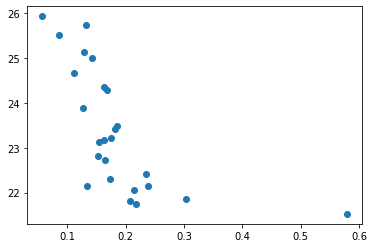

In [48]:
import matplotlib.pyplot as plt

plt.scatter(tmp, df['평균이동시간'])
plt.show()

In [44]:
tmp2 = pd.DataFrame({
    "정류장수대비노선수":tmp,
    "평균이동시간":df['평균 이동 시간(분)']
})

In [45]:
tmp2.corr()

,정류장수대비노선수,평균이동시간
정류장수대비노선수,1.000000,-0.635971
평균이동시간,-0.635971,1.000000


In [40]:
spst.ttest_ind(df['총 이동 시간'], tmp)

Ttest_indResult(statistic=41.51363677345545, pvalue=2.851526492163009e-39)

In [41]:
spst.ttest_ind(df['승차총승객수'], tmp)

Ttest_indResult(statistic=17.28053022937201, pvalue=3.04397490546944e-22)

In [36]:
spst.ttest_ind(df['정류장수'], df['평균 이동 시간(분)'])

Ttest_indResult(statistic=18.874216826624252, pvalue=7.514355532029135e-24)

In [49]:
station = pd.read_csv("df_seoul_bus_station.csv")

In [50]:
station

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [52]:
df['정류장수대비노선수'] = df['노선수']/df['정류장수']

In [53]:
df.sort_values(by="정류장수대비노선수", ascending=True)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,정류장수대비노선수
1,강동구,369,21,2890053,2830506,99.161194,97.118065,0.056911
3,강서구,566,49,4681083,4652828,88.119480,87.587591,0.086572
8,노원구,514,57,4353295,4292724,88.476211,87.245168,0.110895
24,중랑구,380,48,3792541,3740923,87.403863,86.214261,0.126316
9,도봉구,359,46,3304305,3211421,106.859356,103.855540,0.128134
17,송파구,415,55,5641742,5603488,114.270072,113.495260,0.132530
15,성동구,435,58,2807280,2746738,96.377369,94.298888,0.133333
21,은평구,501,71,5201660,5122499,106.395173,104.776007,0.141717
5,광진구,269,41,2749448,2753411,118.352546,118.523137,0.152416
14,서초구,600,93,7221330,6977950,126.687777,122.418028,0.155000


In [37]:
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.457965,0.639658,0.276925,0.531874
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.199466,0.387141,0.359348,0.370605
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.693565,-0.013633,0.360500,0.188197
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.146534,0.472734,0.572455,0.568742
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.135064,0.460952,0.564608,0.550686
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.410118,-0.080959,0.124998,0.051692
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.387490,-0.076575,0.133859,0.045831
평균 이동 시간(분),0.457965,0.199466,-0.693565,-0.146534,-0.135064,-0.410118,-0.387490,1.000000,0.360419,-0.125621,0.120281
이동인구(합),0.639658,0.387141,-0.013633,0.472734,0.460952,-0.080959,-0.076575,0.360419,1.000000,0.812646,0.963787
총 이동 시간,0.276925,0.359348,0.360500,0.572455,0.564608,0.124998,0.133859,-0.125621,0.812646,1.000000,0.908128


### 3)

## 4.관계 정리

### 1) 강한 관계의 변수

- 승차 총 승객수, 하차 총 승객수
- 도착 시군구 코드, 정류장 수
- 도착시군구 코드, 승차총승객수
- 도착시군구 코드, 하차총승객수
- 도착시군구 코드, 평균이동시간
- 도착시군구코드, 평균이동인구
- 도착시군구코드, 총 이동인구
- 정류장수, 승차총승객수
- 정류장수, 하차총승객수
- 노선수, 승차총승객수
- 노선수, 하차총승객수
- 노선수, 승차평균승객수
- 노선수, 하차평균승객수
- 노선수, 평균이동시간 ->음
- 승차총승객수, 승차평균승객수
- 승차총승객수, 하차평균승객수
- 승차총승객수, 평균 이동인구
- 승차총승객수, 총 이동시간
- 승차총승객수, 총 이동인구합
- 하차 총 승객수, 승차 평균 승객수
- 하차 총승객수, 하차평균승객수
- 하차총승객수, 평균 이동인구
- 하차총승객수, 총 이동시간
- 하차총승객수, 총 인구합
- 승차평균승객수, 하차평균승객수
- 평균 이동인구, 총 이동시간
- 평균 이동인구, 총 이동인구
- 총 이동시간, 총 이동인구

### 중간
- 정류장수, 노선수
- 정류장수, 평균 이동인구
- 정류장수, 총 이동시간
- 정류장수, 총 이동인구
- 도착시군구코드, 총 이동시간
- 노선수, 총 이동시간
- 승차평균승객수, 평균이동시간
- 하차평균승객수, 평균이동시간
- 평균이동시간, 평균 이동인구

### 2) 약한 관계의 변수

- 이동인구, 하차평균승객수
- 도착 시군구 코드, 노선수 -> 음
- 도착 시군구 코드, 승차평균승객수
- 도착시군구 코드, 평균이동시간
- 도착 시군구 코드, 하차 평균 승객수
- 정류장 수, 승차평균승객수
- 정류장 수, 하차평균승객수
- 정류장수, 평균이동시간
- 노선수, 평균 이동인구
- 노선수, 총 이동인구
- 승차 총 승객수, 평균이동시간 ->음
- 하차 총 승객수, 평균이동시간 ->음
- 승차 평균 승객수, 총 이동시간
- 승차 평균 승객수, 총 이동인구
- 하차 평균 승객수, 평균 이동인구
- 하차평균승객수, 총 이동시간
- 하차평균승객수, 총 이동인구
- 평균이동시간, 총 이동시간
- 평균이동시간, 총 이동인구
- 

- 1) 노선이 많으면 평균 이동시간이 줄어든다.
- 정류장이 많다고해서 평균이동시간이 줄어들지는 않음.
- 2) 평균/총 이동인구가 많으면 평균 이동시간이 늘어난다.
    - 그러면 평균이동시간을 줄어들게하려면 평균/총 이동인구를 줄여야함.
    - 그렇게 하려면 타고내리는사람을 줄여야해.
    - 그럴려면 정류장을 줄여야해?
- 3) 정류장이 많으면 타고 내리는 사람이 늘어난다. (카드를 많이 찍으니까)
- 4) 버스에 타고 내리는 사람이 많으면 총 이동시간과 총 이동인구가 늘어난다. (똑같은거)
    하지만 평균이동시간과는 관계없다. 
    - => 타고내리는 사람이 많아도 평균이동시간은 변함없음
- 5) 

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

- 사람이 많은 곳에 노선